# #️⃣ MNIST Classification - 99.6% Accuracy (TOP 10% Leaderboard)

<img src='https://drive.google.com/uc?export=download&id=16b1e8LPq6YwepaXv2UEbKZ5tjpZ0nqoe'>

This notebooks aims to permform a very high score (99.6%) based on the famous **MNIST dataset** from Kaggle containing *42000 examples* in the training set.

Once the model trained, predictions will be made on the *28000 test images* and submitted to the competition.

# Getting Started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
# Load the images into pandas dataframes
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

# Prepare X and y
X_train = (train.drop('label', axis=1) / 255).values.reshape(-1, 28, 28, 1)
X_test = (test / 255).values.reshape(-1, 28, 28, 1)
y_train = np.array(pd.get_dummies(train['label']))

# Display Data

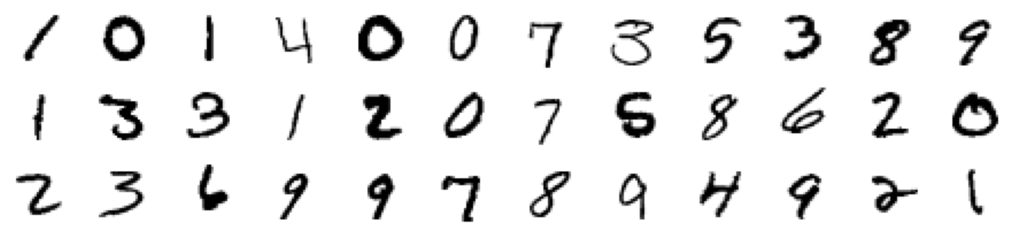

In [3]:
plt.figure(figsize=(18, 4))

for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train[i], cmap='binary')
    plt.axis('off')

plt.show()

# Generate More Images

In [4]:
# Data generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

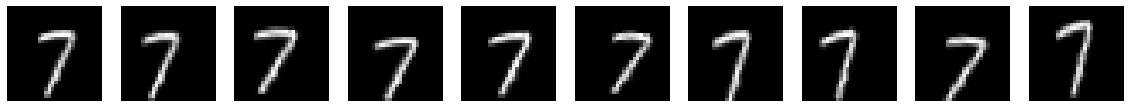

In [5]:
# Example of image generations
X_example = X_train[18].reshape(1, 28, 28, 1)
y_example = y_train[18].reshape(1, 10)

plt.figure(figsize=(20, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    X_new, y_new = datagen.flow(X_example, y_example).next()
    plt.imshow(X_new.reshape(28, 28), cmap='gray')
    plt.axis('off')
    
plt.show()

# Training

In [12]:
inputs = tf.keras.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=5, strides=2, padding='same', activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=4, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.4)(x)
outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_9 (Batch (None, 12, 12, 32)        128 

In [13]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, train_size=0.9, shuffle=True, random_state=0
)

In [14]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']   
)

history = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_val, y_val),
    epochs=50,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda x: 1e-3 * 0.95 ** x, verbose=0
        )
    ]
)

Epoch 1/50
532/532 [==============================] - 13s 21ms/step - loss: 0.4893 - accuracy: 0.8489 - val_loss: 0.2459 - val_accuracy: 0.9201
Epoch 2/50
532/532 [==============================] - 11s 20ms/step - loss: 0.1404 - accuracy: 0.9574 - val_loss: 0.0426 - val_accuracy: 0.9854
Epoch 3/50
532/532 [==============================] - 12s 22ms/step - loss: 0.1095 - accuracy: 0.9675 - val_loss: 0.0404 - val_accuracy: 0.9857
Epoch 4/50
532/532 [==============================] - 11s 20ms/step - loss: 0.0870 - accuracy: 0.9738 - val_loss: 0.0249 - val_accuracy: 0.9915
Epoch 5/50
532/532 [==============================] - 11s 20ms/step - loss: 0.0745 - accuracy: 0.9781 - val_loss: 0.0424 - val_accuracy: 0.9886
Epoch 6/50
532/532 [==============================] - 11s 21ms/step - loss: 0.0728 - accuracy: 0.9782 - val_loss: 0.0258 - val_accuracy: 0.9923
Epoch 7/50
532/532 [==============================] - 11s 20ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0221 - val_accuracy:

# Results

In [15]:
print("Training Accuracy: {:.3f} %".format(max(history.history['accuracy']) * 100))
print("Validation Accuracy: {:.3f} %".format(max(history.history['val_accuracy']) * 100))

Training Accuracy: 99.671 %
Validation Accuracy: 99.735 %


This is a very good accuracy score.

# Display Predictions

In [22]:
predictions = model.predict(X_test).argmax(axis=1)

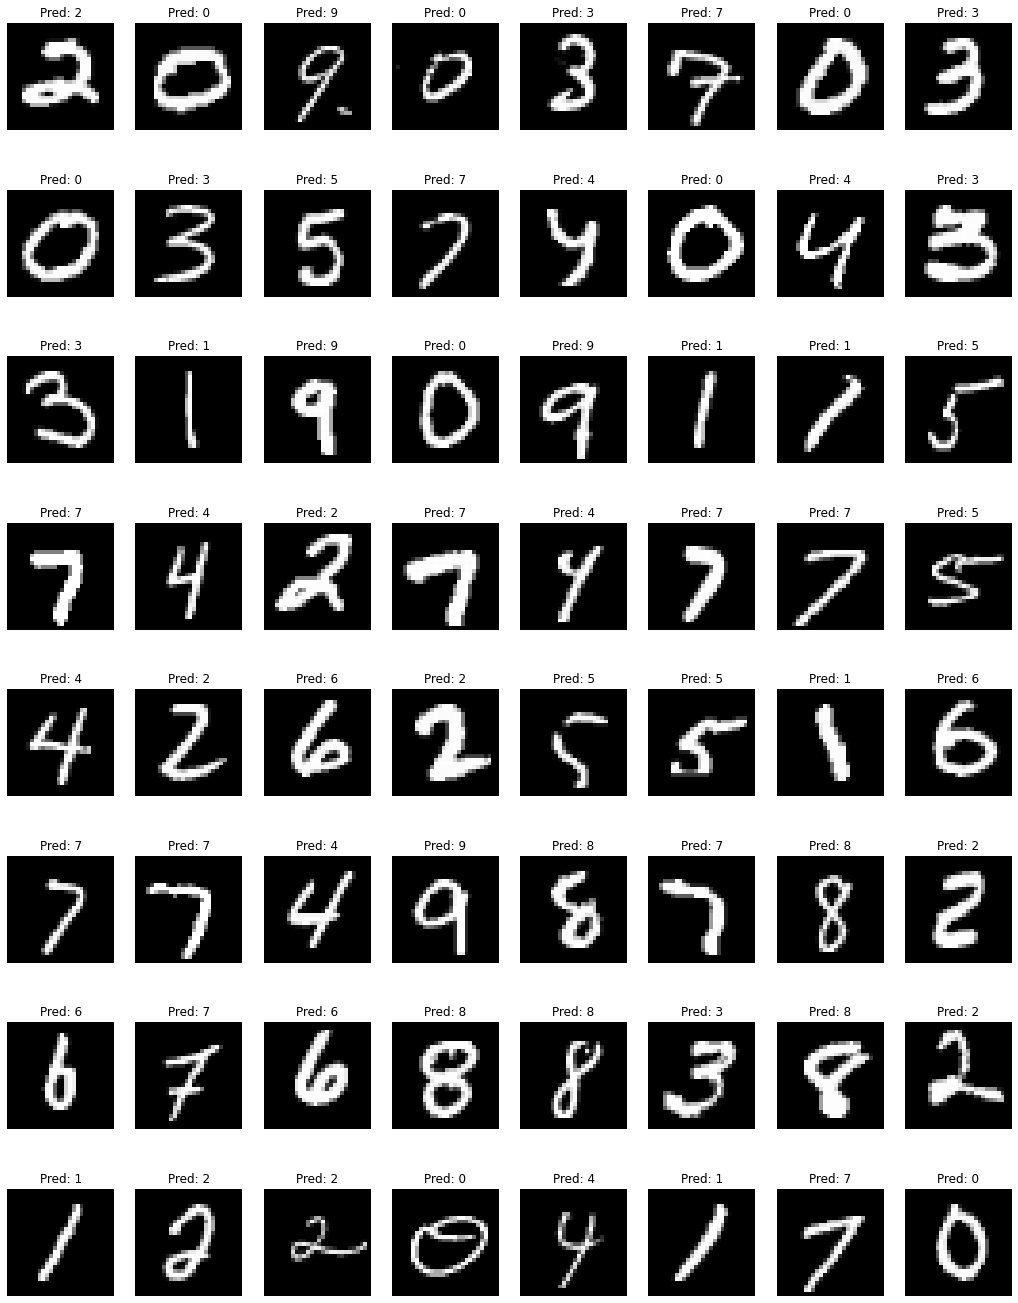

In [23]:
# Display predictions
plt.figure(figsize=(18, 24))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
    
plt.show()

The predictions seem correct.

# Generate Submission

In [28]:
sample_submission = pd.read_csv('../input/digit-recognizer/sample_submission.csv')
sample_submission['Label'] = predictions
sample_submission.to_csv('submission.csv', index=False)
sample_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


Accuracy score on the test set after submission: **99.607 %**